In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,r2_score,f1_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv("IRIS.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Data Visualization


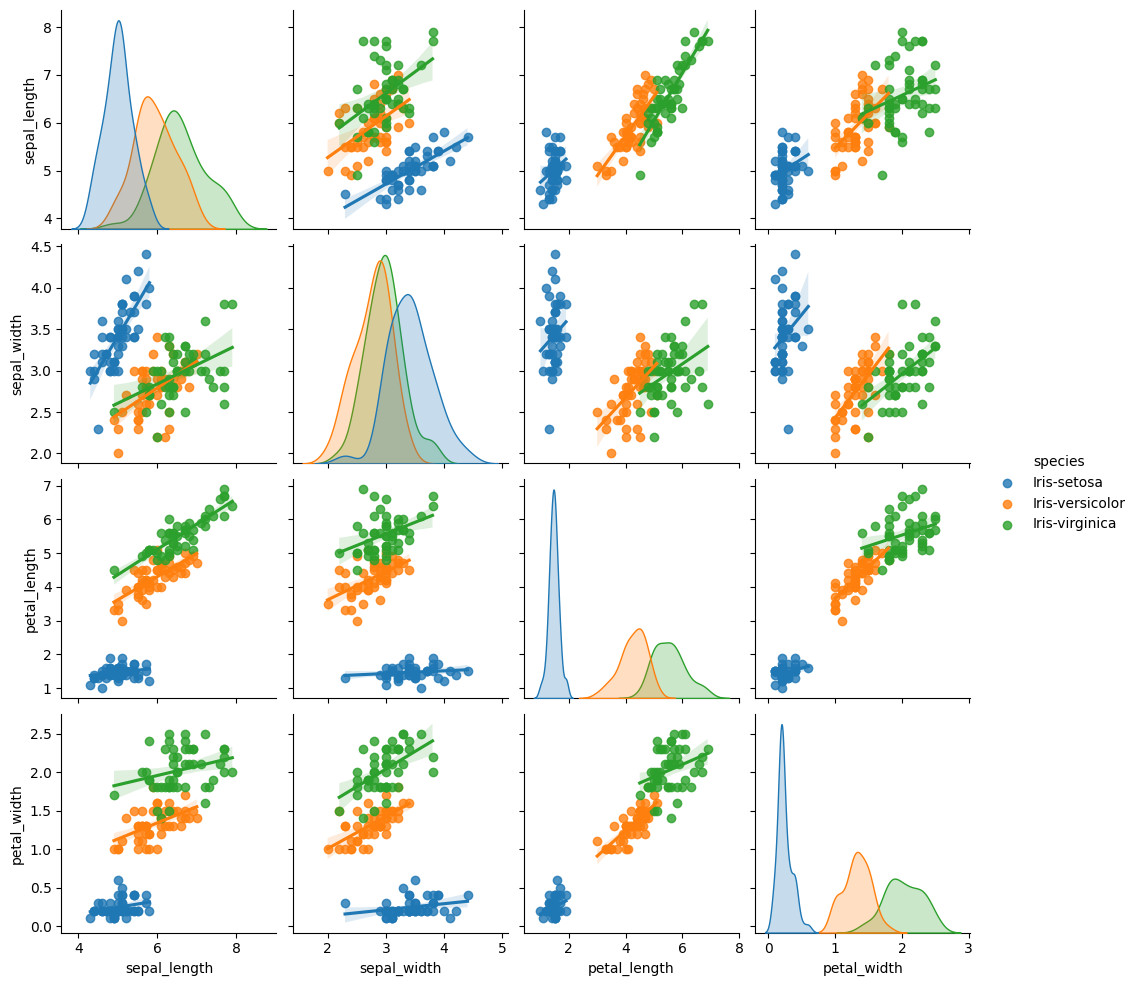

In [9]:
sns.pairplot(df,kind="reg",hue="species")

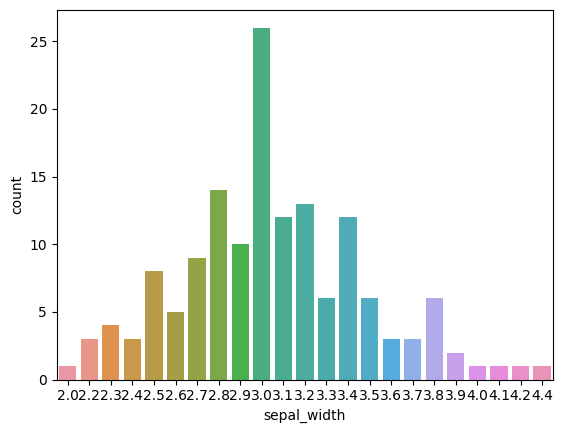

In [10]:
sns.countplot(x=df.sepal_width)
plt.show()

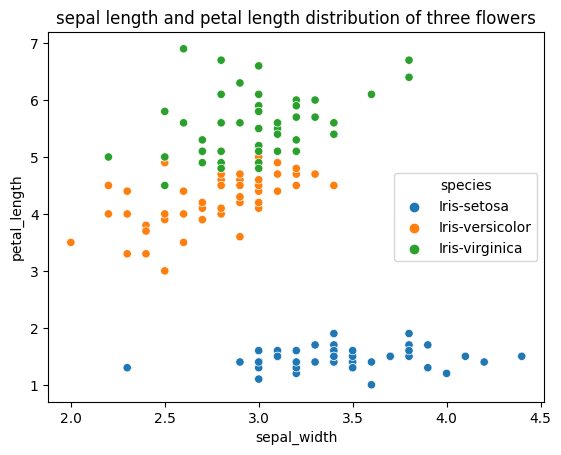

In [11]:
sns.scatterplot(x=df.sepal_width,y=df.petal_length,hue=df.species).set_title("sepal length and petal length distribution of three flowers")
plt.show()

# creating ML classify model

In [12]:
lb_make=LabelEncoder()
df['species']=lb_make.fit_transform(df['species'])
df.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species
93,5.0,2.3,3.3,1.0,1
87,6.3,2.3,4.4,1.3,1
35,5.0,3.2,1.2,0.2,0


In [13]:
x=df.drop("species",axis=1)
y=df.species

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 1. naive Bayes


In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [17]:
y_pred=nb.predict(x_test)

In [18]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [19]:
acc=accuracy_score(y_pred,y_test)

In [20]:
acc

0.9666666666666667

# 2.Random forest classifier

In [21]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
ypre=rfc.predict(x_test)

In [22]:

print(classification_report(y_test, ypre))
print(confusion_matrix(y_test, ypre))
print('accuracy is',accuracy_score(ypre,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


# 3. svm (support vector machine)

In [23]:
svc=SVC()

In [24]:
svc.fit(x_train,y_train)

SVC()

In [25]:
y_pre=svc.predict(x_test)


In [26]:
cr=classification_report(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
accu=accuracy_score(y_pred,y_test)

In [27]:
print("classification Report",cr)
print("confusion Metrix",cm)
print("Accuracy of svc model",accu)

classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

confusion Metrix [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy of svc model 0.9666666666666667
